In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm 
plt.rcParams['figure.figsize'] = (16, 9) 
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

data = pd.read_csv("./articulos_ml.csv")

In [4]:
print(data.shape)

(161, 8)


In [5]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [6]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113633780>,
      dtype=object)

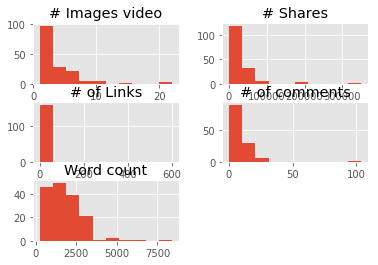

In [7]:
data.drop(['Title','url', 'Elapsed days'],1).hist()

In [8]:
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

In [9]:
type(filtered_data)

pandas.core.frame.DataFrame

In [10]:
filtered_data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400


In [11]:
colores=['orange','blue'] 
tamanios=[30,60]

f1 = filtered_data['Word count'].values 
f2 = filtered_data['# Shares'].values



In [12]:
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808): 
        asignar.append(colores[0])
    else: 
        asignar.append(colores[1])

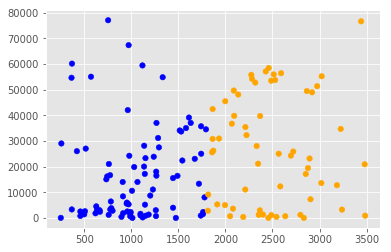

In [13]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])

In [14]:
dataX =filtered_data[["Word count"]]

In [15]:
X_train = np.array(dataX)

In [16]:
y_train = filtered_data['# Shares'].values

In [17]:
regr = linear_model.LinearRegression()

In [18]:
regr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = regr.predict(X_train)

In [21]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [5.69765366]


In [22]:
print('Independent term: \n', regr.intercept_)

Independent term: 
 11200.303223074157


Text(0.5,1,'Regresión Lineal')

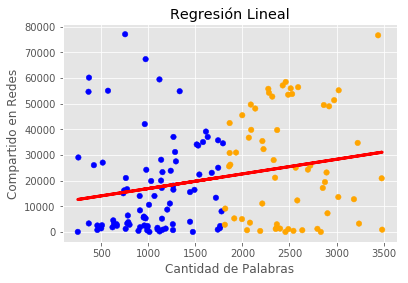

In [23]:
plt.scatter(X_train[:,0], y_train, c=asignar, s=tamanios[0]) 
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)
plt.xlabel('Cantidad de Palabras') 
plt.ylabel('Compartido en Redes') 
plt.title('Regresión Lineal')

In [24]:
y_Dosmil = regr.predict([[2000]])

In [25]:
print(int(y_Dosmil))

22595


In [26]:
y_Dosmil = regr.predict([[1900]])
print(int(y_Dosmil))

22025
